# Отчёт по анализу данных, лабораторная 4, номер 2
---
  **Автор:** Нуждин Алексей Владимирович
*   **Дата:** 06.11.2025
*   **Группа:** ИТ-6

Загрузите данные из файла «weather1.csv» о погоде в Перми. Загрузите только следующие столбцы:

*   Местное время в Перми
*   T (температура воздуха в градусах Цельсия)

*   P (атмосферное давление в мм.рт.ст.)

*   U (относительная влажность в %)
*   Ff (скорость ветра в м/с)
*   N (облачность)

*   H (высота основания облаков, м)
*   VV (горизонтальная дальность видимости в км)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
matplotlib.use('Agg')
from matplotlib.colors import ListedColormap
import seaborn as sns
import math

def load_data(name,collons):
    return pd.read_csv(name,sep=';',usecols=collons,encoding='utf-8')
df= load_data('weather1.csv',
                    ["Местное время в Перми",'T','P','U',
                    'Ff','N','H','VV'])
print(df)


     Местное время в Перми     T      P   U  Ff                          N  \
0         31.12.2021 23:00  -9.8  762.5  83   3                      100%.   
1         31.12.2021 20:00 -10.6  764.2  81   3                      100%.   
2         31.12.2021 17:00 -11.6  765.5  79   2  90  или более, но не 100%   
3         31.12.2021 14:00 -11.9  766.7  77   1                      100%.   
4         31.12.2021 11:00 -13.6  767.5  79   1                      100%.   
...                    ...   ...    ...  ..  ..                        ...   
2914      01.01.2021 14:00 -13.0  778.4  82   3                      100%.   
2915      01.01.2021 11:00 -12.9  778.4  80   4                      100%.   
2916      01.01.2021 08:00 -12.4  778.3  79   4                      100%.   
2917      01.01.2021 05:00 -12.3  778.7  80   4                      100%.   
2918      01.01.2021 02:00 -12.6  778.6  80   2                      100%.   

              H    VV  
0      600-1000   4.0  
1     1000-1500

Постройте точечную диаграмму (диаграмму рассеяния) по признакам температуры и относительной влажности.

In [4]:
def diogramm_T_U_1(df):
    plt.scatter(df['T'],df['U'],color="red", alpha=0.5)
    plt.xlabel("Температура")
    plt.ylabel("Влажность воздуха")
    plt.title("Диаграмма рассеяния")
    plt.savefig('T_U_Diogramm_1.png')
    plt.clf()
diogramm_T_U_1(df)

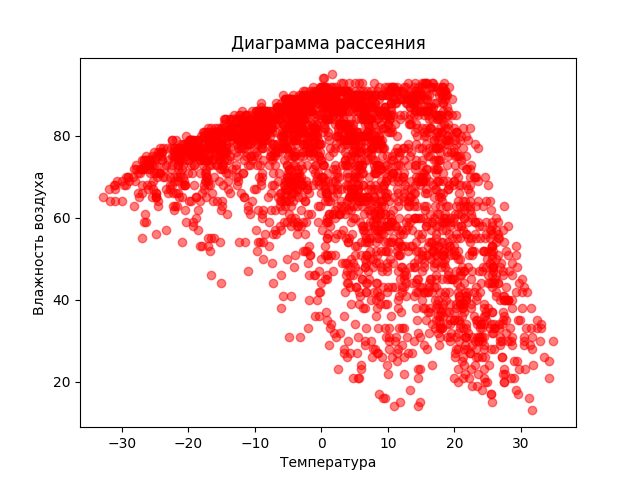

Исходя из представленной диограммы можно сделать вывод, что при низких температурах чаще всего имеет место быть высокая влажность воздуха. По мере повышения температуры этот показатель распределяется, достигая своего минимума при значении более 30 градусов цельсия.

---
На построенной в предыдущем пункте диаграмме выделите точки разными цветами в зависимости от облачности: синим – для которых облачность составляет 100%; красным – все остальные.


In [5]:
def diogramm_T_U(df):
    colors=["red","blue"]
    cond=df['N']=="100%."
    cmap_binary = ListedColormap(colors)
    plt.scatter(df['T'],df['U'],c=cond, cmap=cmap_binary, alpha=0.5)
    plt.xlabel("Температура")
    plt.ylabel("Влажность воздуха")
    plt.title("Диаграмма рассеяния")
    plt.savefig('T_U_Diogramm.png')
    plt.clf()
diogramm_T_U(df)

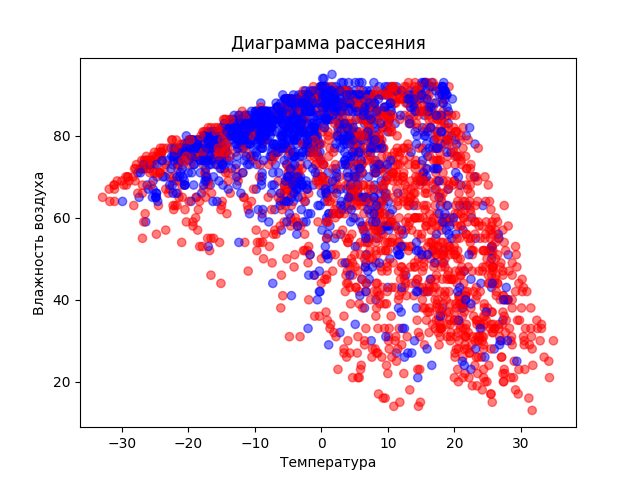

Исходя из представленной диограммы можно сделать вывод, что максимальная олачность чаще всего встречается при высоком поакзателе влажности воздуха, при температурах в пределах от -10 до 10 градусов цельсия

---

Постройте линейную диаграмму (график) изменения температуры в зависимости от местного времени.[Текст ссылки](https://)

In [ ]:
def diogramm_Time_T(df):
    sns.set_style("whitegrid")
    sns.lineplot(data=df, x="T", y="Местное время в Перми", marker='o', linewidth=2.5)
    plt.xlabel("Температура")
    plt.ylabel("Местное время в Перми")
    plt.title("Обычный граф")
    plt.savefig('Time_T_Diogramm.png')
    plt.clf()
diogramm_Time_T(df)

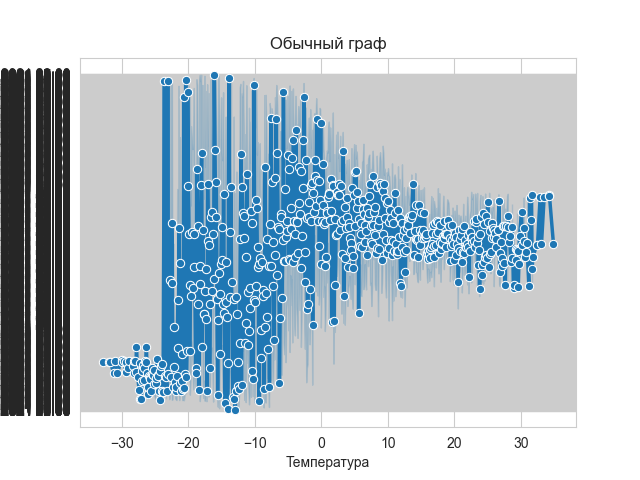

---

 Посчитайте по имеющимся данным среднемесячную температуру и постройте столбчатую диаграмму (вертикальную) зависимости средней температуры от месяца. Подсказка: создайте отдельный столбец с номером месяца (вычислив его из столбца «Местное время»), а затем сгруппируйте данные по этому столбцу.

In [6]:
def diogramm_meanT_month(df):
    result=df.groupby('Месяц')['T'].mean().reset_index(name='Tm')
    sns.barplot(data=result, x='Месяц', y='Tm', hue='Месяц', palette='viridis', legend=False)
    plt.xlabel("Месяц")
    plt.ylabel("Средняя Температура")
    plt.title("Столбчатая диограмма")
    plt.savefig('mT_M_Diogramm.png')
    plt.clf()

def get_month(df):
    result=[]
    for i in df['Местное время в Перми']:
        result.append(i.split('.')[1])
    return result

df["Месяц"]=get_month(df)
diogramm_meanT_month(df)

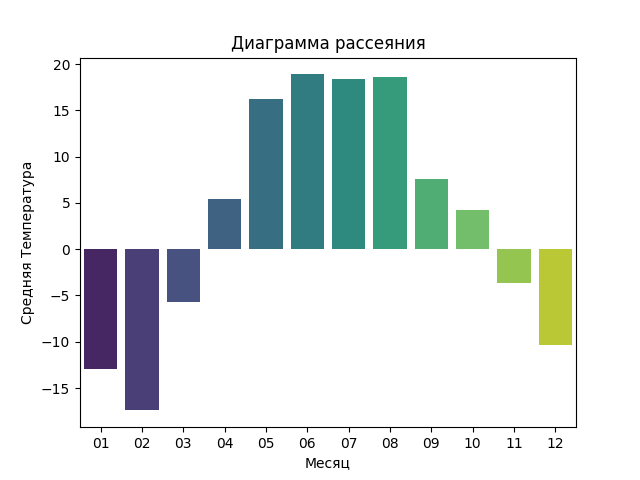

Исходя из представленной диограммы можно сделать вывод, что средняя температура достигает своей минимальной отметки во 2-ом месяце года(Феврале), в то время, как максимальная отметка достигается на 6-ом месяце

---

Постройте ленточную диаграмму (горизонтальную), отразив на ней количество имеющихся наблюдений для каждого варианта облачности.

In [7]:
def diogramm_countN_N(df):
    plt.figure(figsize=(50, 6))
    result=df.groupby('N')['N'].count().reset_index(name='count')
    sns.barplot(data=result, x='count', y='N', hue='N', palette='viridis', legend=False)
    plt.xlabel("Количество")
    plt.ylabel("Варианты облочности")
    plt.title("Ленточная диограмма")
    plt.savefig('сN_N_Diogramm.png')
    plt.clf()
diogramm_countN_N(df)

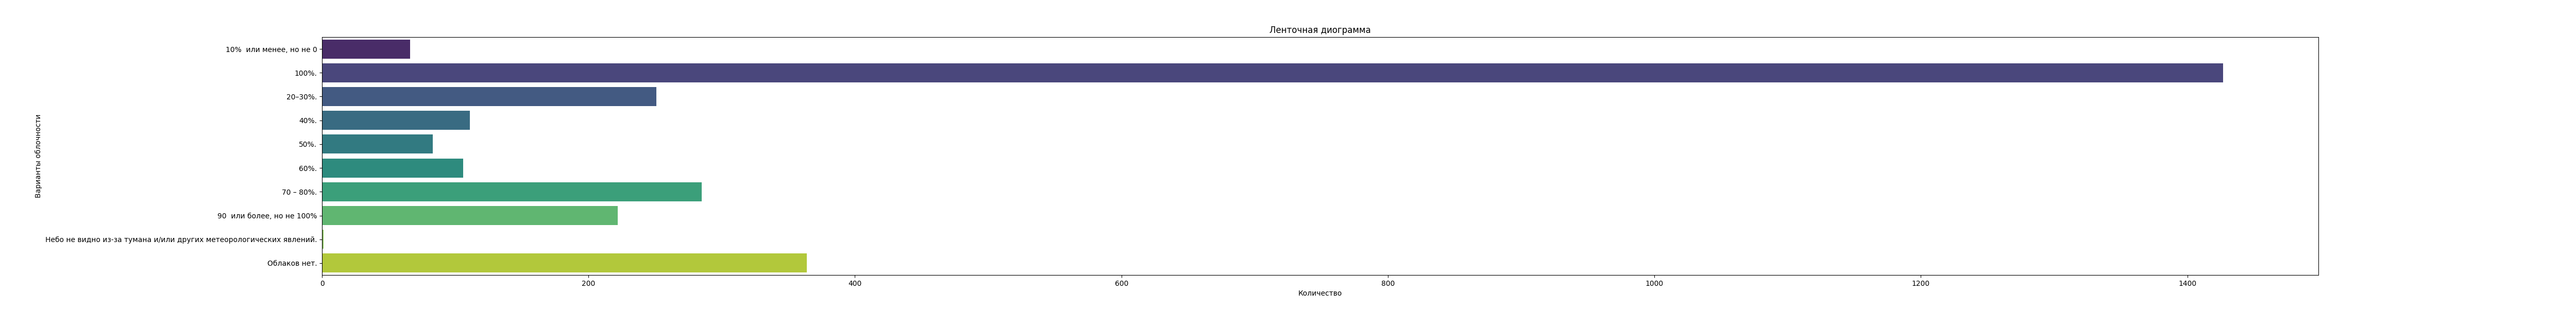

Исходя из представленной диограммы можно сделать вывод, что максимальное количество вариантов облочности достигают дни со 100%-ной олачности. Интересно, что вторым по частотности является нулевая олачность.


---
Постройте гистограмму частот для температуры. На гистограмме должно быть 10 диапазонов температуры.


In [8]:
def diogramm_interval_T(df):
    plt.hist(df['T'],10)
    plt.xlabel("Температура")
    plt.ylabel("Количество")
    plt.title("Гистограмма")
    plt.savefig('In_T_Diogramm.png')
    plt.clf()
diogramm_interval_T(df)

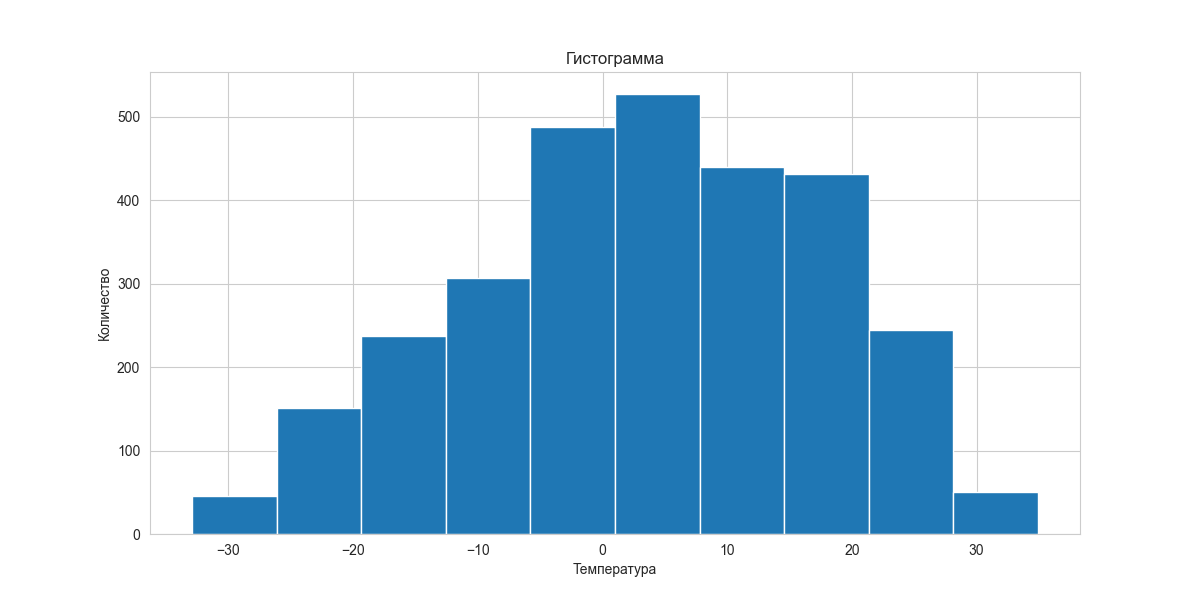

Исходя из представленной диограммы можно сделать вывод, что чаще всего в году(более 500 случаев) температура была в пределах от 0 до 10 градусов, вторым по каличеству является от -10 до 0 градусов. Количество экстремально высоких и экстремально ниских температур в сравнении со средним значением незначительны.

---
Разбейте данные на 3 группы по значению горизонтальной дальности видимости (одна группа – дальность видимости менее 5 км, вторая – от 5 до 15 км(включительно), третья – более 15 км). В одной области для каждой группы постройте boxplot (диаграмму «ящик с усами») для признака «атмосферное давление».


In [9]:
def diogramm_boxplot(df):
    bins = [0, 5, 15, df['VV'].max()]
    labels = ['< 5', '5-15', '≥ 15']
    df['VV_Range'] = pd.cut(df['VV'], bins=bins, labels=labels, include_lowest=True)
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='VV_Range', y='P')
    plt.ylabel("Атмосферное давление")
    plt.xlabel("Диапазоны дальности видимости")
    plt.title("Диограмма с усами")
    plt.savefig('boxplot_Diogramm.png')
    plt.clf()

diogramm_boxplot(df)

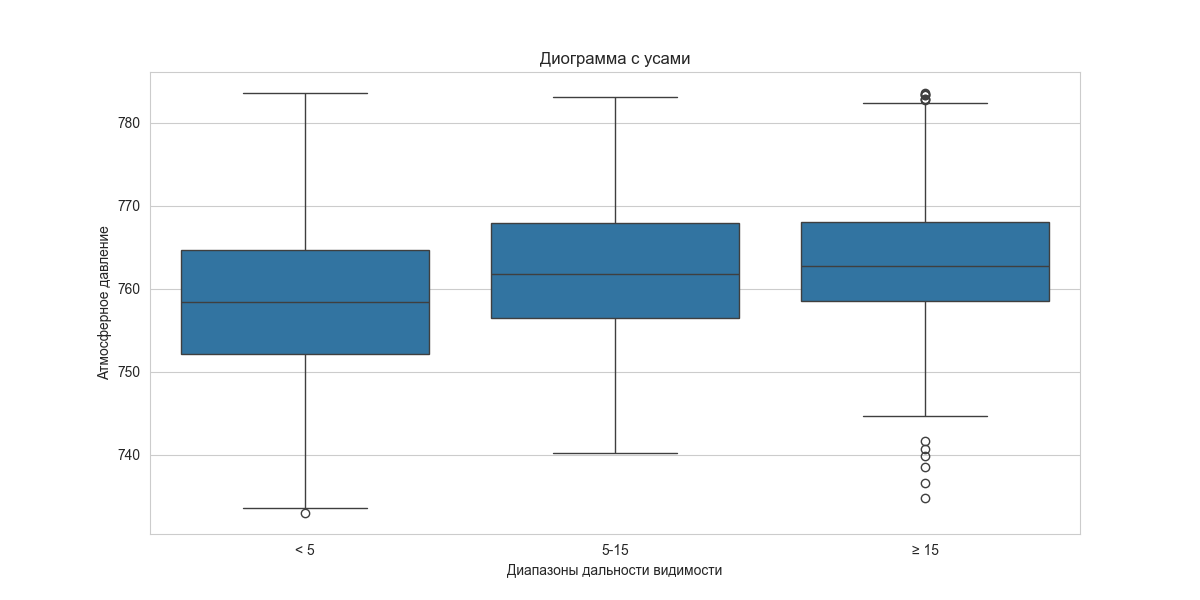


---

Постройте круговую диаграмму для признака «высота основания облаков».

In [10]:
def diogramm_pie(df):
    plt.figure(figsize=(12, 10))
    result=df.groupby('H')['H'].count().reset_index(name='count')
    plt.pie(result['count'], labels=result['H'], autopct='%1.1f%%')
    plt.title("Круговая диограмма")
    plt.savefig('pie_Diogramm.png')
    plt.clf()
diogramm_pie(df)

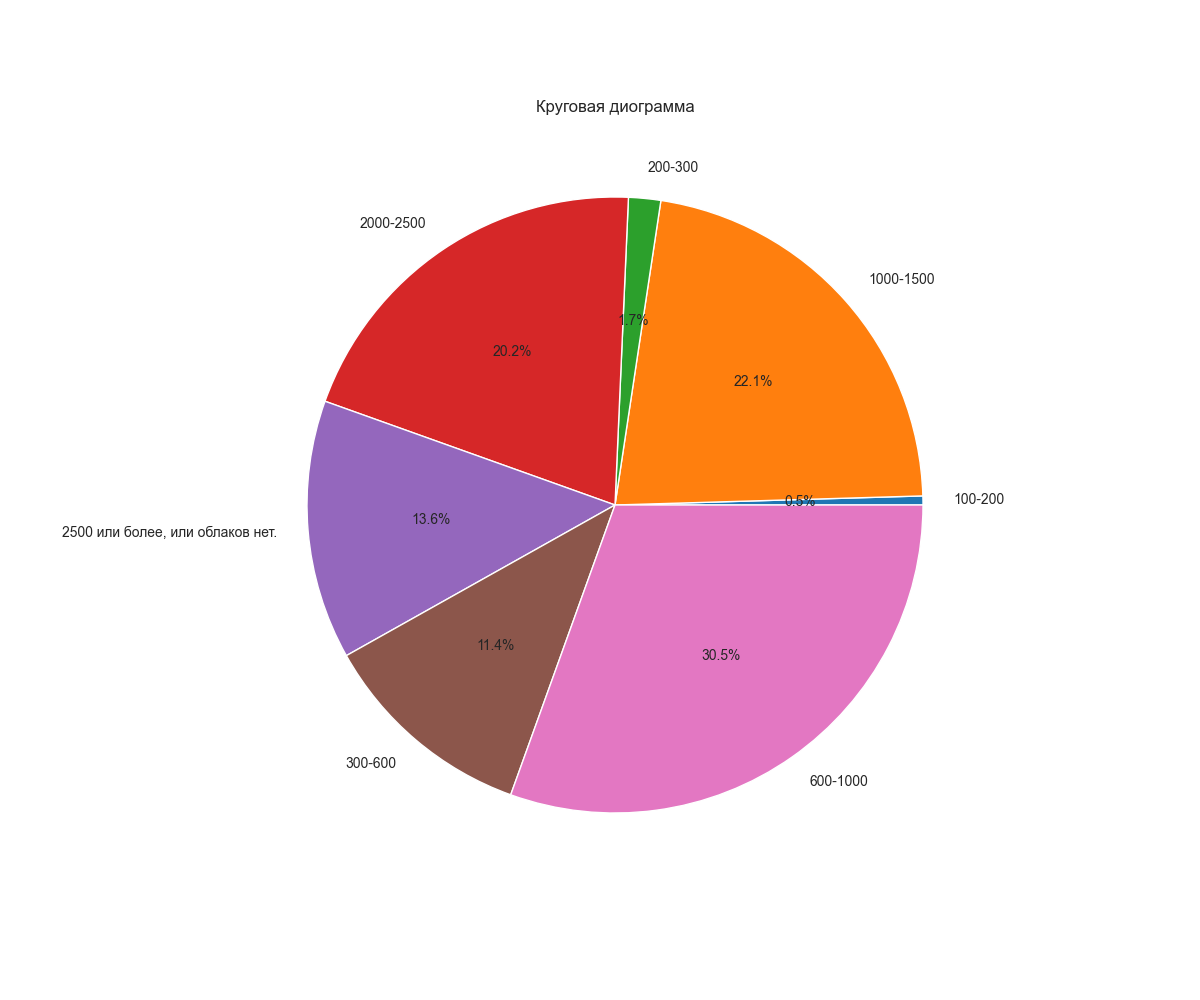

Исходя из представленной диограммы можно сделать вывод, что чаще всего в году(30 %) облака находились на высоте между 600 и 1000 м над уровнем моря. Второе и третье место (22.1% и 20.2%) соответственно занимают дистанции от 1000 до 1500 и от 2000 до 2500.